<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/CVLC_06_InceptionResNetV2(public__private_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [52]:
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')

In [75]:
train.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [77]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [70]:
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/0
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/1
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/2
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/3
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/4
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/5
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/6
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/7
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/8
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/9
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_test

In [76]:
import cv2

for idx in range(len(train)) :
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    cv2.imwrite(f'/content/drive/MyDrive/DACON_CVLC/data/images_train/{digit}/{train["id"][idx]}.png', img)

for idx in range(len(test)) :
    img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
    cv2.imwrite(f'/content/drive/MyDrive/DACON_CVLC/data/images_test/{test["id"][idx]}.png', img)

In [78]:
model =  tf.keras.applications.InceptionResNetV2(weights=None, include_top=True, input_shape=(224, 224, 1), classes=10)

In [79]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None), metrics=['accuracy'])

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

train_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='validation')

Found 1642 images belonging to 10 classes.
Found 406 images belonging to 10 classes.


In [82]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'./content/drive/MyDrive/DACON_CVLC/Checkpoint', monitor='val_accuracy', save_best_only=True, verbose=1)

In [83]:
model.fit_generator(train_generator, epochs=500, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/500
52/52 [==============================] - 52s 428ms/step - loss: 2.1390 - accuracy: 0.2862 - val_loss: 4.0149 - val_accuracy: 0.0936

Epoch 00001: val_accuracy improved from -inf to 0.09360, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DACON_CVLC/Checkpoint/assets
Epoch 2/500
52/52 [==============================] - 19s 356ms/step - loss: 1.2346 - accuracy: 0.5664 - val_loss: 11.4593 - val_accuracy: 0.0961

Epoch 00002: val_accuracy improved from 0.09360 to 0.09606, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint
INFO:tensorflow:Assets written to: /content/drive/MyDrive/DACON_CVLC/Checkpoint/assets
Epoch 3/500
52/52 [==============================] - 19s 354ms/step - loss: 1.0063 - accuracy: 0.6626 - val_loss: 6.3265 - val_accuracy: 0.0985

Epoch 00003: val_accuracy improved from 0.09606 to 0.09852, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint
INFO:tensorflow:Assets written

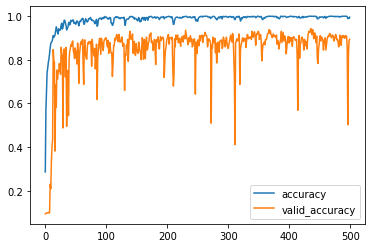

In [84]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"], label='accuracy')
plt.plot(model.history.history["val_accuracy"], label='valid_accuracy')

plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CVLC/Checkpoint/model.h5', compile=False)

In [86]:
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_test/none
!mv /content/drive/MyDrive/DACON_CVLC/data/images_test/*.png /content/drive/MyDrive/DACON_CVLC/data/images_test/none

In [87]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_test', target_size=(224,224), color_mode='grayscale', class_mode='categorical', shuffle=False)

Found 20480 images belonging to 1 classes.


In [88]:
predict = model.predict_generator(test_generator).argmax(axis=1)

In [89]:
print(predict)

[4 4 6 ... 8 1 7]


In [94]:
submission = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')
submission['digit'] = predict
# submission = submission[['id', 'digit']]
submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/submission.csv', index=False)

In [97]:
submission["predict"] = predict

In [98]:
from collections import Counter

for i in range(len(submission)) :
    predicts = submission.loc[i, ['predict']]
    submission.at[i, "digit"] = Counter(predicts).most_common(n=1)[0][0]

submission.head()

,id,digit,predict
0,2049,4,4
1,2050,4,4
2,2051,6,6
3,2052,9,9
4,2053,5,5


In [99]:
submission = submission[['id', 'digit']]
submission.head()

,id,digit
0,2049,4
1,2050,4
2,2051,6
3,2052,9
4,2053,5


In [100]:
submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/submission.csv', index=False)

# 여기까지

In [ ]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

In [101]:
# 적용
submission['digit'] = np.argmax(model.predict(test_generator), axis=1)
submission.head()

,id,digit
0,2049,4
1,2050,4
2,2051,6
3,2052,9
4,2053,5


In [103]:
# 파일저장
submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/Sub.csv', index=False)